# Chatbot para el análisis básico de DS con PandasAI

Exportar las variables de entorno para compartir la llave privada.

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

Exportar bibliotecas de OpenAI

In [2]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

llm = OpenAI()

## Agregar los datasets a analizar

### Analizar un dataset a la vez

In [3]:
ai_response = SmartDataframe("ds/respondidas.csv", config={"llm": llm})
ai_no_response = SmartDataframe("ds/no_respondidas.csv", config={"llm": llm, "conversational": True})

### Analizar datasets en conjunto

In [4]:
import pandas as pd
from pandasai import SmartDatalake

In [5]:
response = pd.read_csv("ds/respondidas.csv")
no_response = pd.read_csv("ds/no_respondidas.csv")

In [6]:
ai_group = SmartDatalake([response, no_response], config={"llm": llm})

### Analizar por medio de un agente

In [7]:
from pandasai import Agent

In [8]:
ai = Agent([response, no_response], config={"llm": llm}, memory_size=10)

## Preguntar

### Un dataframe a la vez

Usa la instrucción `ds.chat("Pregunta")` para hacer una pregunta.

Usa la instrucción `ds.last_code_generated` para ver el código que generó la pregunta, útil para depuración.

In [9]:
ai_response.chat("Cuantos registros existen")

900

In [10]:
ai_response.chat("Cuantos son cita de primera vez")

217

In [11]:
ai_response.chat("Cuantas consultas obtuvieron el resultado esperado")

717

In [12]:
ai_response.chat("Cuantas consultas no obtuvieron el resultado esperado")

183

In [13]:
ai_no_response.chat("Cuantas llamadas solicitan pediatría o pedia en la columna Notas")

33

In [14]:
ai_no_response.chat("Cuantas veces se menciona la Preconsulta y la preconsulta en la columna Notas")

48

In [15]:
ai_response.chat("De los registros que no obtuvieron el resultado deseado, cuantas no son de la CDMX")

85

In [16]:
ai_response.chat("De los registros que no obtuvieron el resultado deseado, cuantas son de la CDMX")

98

In [17]:
ai_response.chat("Que día hubo más llamadas y cuantas llamadas hubo")

'El día con más llamadas fue 2023-12-20 con un total de 43 llamadas.'

'/home/jovyan/exports/charts/temp_chart.png'

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/412.


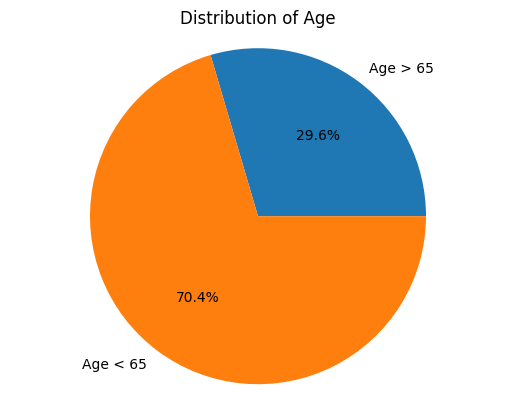

In [18]:
ai_response.chat("Grafica de pastel de aquellos registros con Edad mayor y menor a 65")

In [19]:
ai_response.chat("A que hora se reciben más llamadas")

'The hour with the most calls is 12:00.'

In [20]:
ai_response.chat("A que hora se comienzan a registrarse llamadas")

'Las llamadas comienzan a las 07:46:22.'

In [21]:
print(ai_response.last_code_generated)

df = dfs[0]
df['Hora'] = pd.to_datetime(df['Timestamp']).dt.time
hora_inicio = df['Hora'].min()
result = {'type': 'string', 'value': f'Las llamadas comienzan a las {hora_inicio}.'}


### Preguntar al conjunto de dataframes

In [22]:
ai_group.chat("Cuantos registros existen en total")

1484

In [23]:
ai_group.chat("Cuantos registros hay en la tabla no_response")

584

In [24]:
ai_group.chat("Cuantos registros no obtuvieron el resultado deseado en la tabla response")

183

In [25]:
ai_group.chat("Cuantos registros hay en la tabla no_response más los registros que no obtuvieron el resultado deseado en la tabla response")

767

### Preguntar a un agente

In [26]:
ai.chat("Cuantos registros hay en total")

1484

In [27]:
ai.chat("Y cuantos no obtuvieron el resultado deseado o pertenecen a la segunda tabla")

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'dict' object has no attribute 'to_json'\n"

In [28]:
ai.chat("y a cuantos no se les atendió por 'Solicitud de extensión'")

165